In [45]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn import model_selection, preprocessing, metrics, ensemble
from mlxtend.plotting import plot_confusion_matrix

In [3]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [57]:
def get_data():
    X = df.loc[:, "V1":"V28"]
    y = df.Class
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, test_size = 0.3, random_state = 1)
    scaler = pre
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_data()
n_x = X_train.shape[1]

Applying convolutional layers

Train on 199364 samples, validate on 85443 samples
Epoch 1/10
199364/199364 [==============================] - 31s 153us/step - loss: 0.0134 - acc: 0.9988 - val_loss: 0.0042 - val_acc: 0.9994
Epoch 2/10
199364/199364 [==============================] - 28s 140us/step - loss: 0.0043 - acc: 0.9993 - val_loss: 0.0037 - val_acc: 0.9993
Epoch 3/10
199364/199364 [==============================] - 27s 136us/step - loss: 0.0044 - acc: 0.9992 - val_loss: 0.0040 - val_acc: 0.9993
Epoch 4/10
199364/199364 [==============================] - 27s 136us/step - loss: 0.0042 - acc: 0.9992 - val_loss: 0.0044 - val_acc: 0.9992
Epoch 5/10
199364/199364 [==============================] - 26s 130us/step - loss: 0.0040 - acc: 0.9993 - val_loss: 0.0047 - val_acc: 0.9994
Epoch 6/10
199364/199364 [==============================] - 25s 127us/step - loss: 0.0039 - acc: 0.9993 - val_loss: 0.0053 - val_acc: 0.9992
Epoch 7/10
199364/199364 [==============================] - 29s 143us/step - loss: 0.0042 - acc: 0.9993

(<matplotlib.figure.Figure at 0x130f60fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b59eb38>)

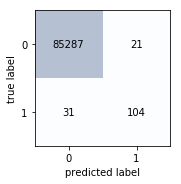

In [65]:
def get_model(n_x):
    model = keras.Sequential()
    model.add(Conv1D(50, kernel_size=(5,), activation="relu", input_shape = (n_x,1)))
    model.add(MaxPooling1D(pool_size=(3,)))
    model.add(Conv1D(50, kernel_size=(5,), activation="relu"))
    model.add(MaxPooling1D(pool_size=(3,)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
    return model

model = get_model(n_x)
model.fit(batch_size=32
          , x=X_train.reshape(-1, n_x, 1)
          , y=y_train
          , epochs=10
          , validation_data=(X_test.reshape(-1, n_x, 1), y_test))

y_test_prob = model.predict(X_test.reshape(-1, n_x, 1))
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
print("Recall: ", metrics.recall_score(y_test, y_test_pred),
      "\nPrecision", metrics.precision_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Fully connected neural network with one hidden layer with size 200

Train on 199364 samples, validate on 85443 samples
Epoch 1/10
199364/199364 [==============================] - 14s 69us/step - loss: 0.0078 - acc: 0.9987 - val_loss: 0.0035 - val_acc: 0.9994
Epoch 2/10
199364/199364 [==============================] - 14s 68us/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0029 - val_acc: 0.9994
Epoch 3/10
199364/199364 [==============================] - 14s 68us/step - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0031 - val_acc: 0.9995
Epoch 4/10
199364/199364 [==============================] - 16s 82us/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0029 - val_acc: 0.9994
Epoch 5/10
199364/199364 [==============================] - 17s 84us/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 6/10
199364/199364 [==============================] - 14s 70us/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0032 - val_acc: 0.9995
Epoch 7/10
199364/199364 [==============================] - 18s 88us/step - loss: 0.0022 - acc: 0.9995 - val_

(<matplotlib.figure.Figure at 0x10f7546d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b099dd8>)

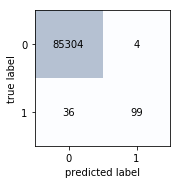

In [66]:
def get_model(n_x):
    model = keras.Sequential()
    model.add(Dense(200, activation="relu", input_shape = (n_x,)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
    return model

model = get_model(n_x)
model.fit(batch_size=32
          , x=X_train
          , y=y_train
          , epochs=10
          , validation_data=(X_test, y_test))

y_test_prob = model.predict(X_test)
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
print("Recall: ", metrics.recall_score(y_test, y_test_pred),
      "\nPrecision", metrics.precision_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Let's compare the result with the RandomForest model in Scikit Learn

Recall:  0.7333333333333333 
Precision 0.9519230769230769


(<matplotlib.figure.Figure at 0x132157080>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1106025f8>)

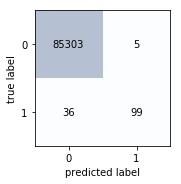

In [39]:
est = ensemble.RandomForestClassifier(random_state=1)
est.fit(X_train, y_train)
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)
print("Recall: ", metrics.recall_score(y_test, y_test_pred),
      "\nPrecision", metrics.precision_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))